# Notebook 4: Ridge and Lasso Regression
Since we are dealing with a lot of multicollinearity in our world bank data, we expect Ridge and Lasso regression to perform better than the least squares regression from Notebook 2.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import glob
import pandas as pd
import sklearn
from src import ana_utils as utils

from sklearn import linear_model

np.random.seed(1)

Import datasets from Notebook 1

In [2]:
wb_data = pd.read_csv("data/wb_data.csv", index_col="Country Name")
wb_data_short = pd.read_csv("data/wb_data_short.csv", index_col="Country Name")
whr_data = pd.read_csv("data/whr_data.csv", index_col="Country name")

Import reduced datasets from Notebook 3

In [3]:
wb_data_pear_reduced_15 = pd.read_csv("data/wb_data_pear_reduced_15.csv").set_index(wb_data.index, inplace=True)
wb_data_pear_reduced_30 = pd.read_csv("data/wb_data_pear_reduced_30.csv").set_index(wb_data.index, inplace=True)
wb_data_vif_reduced_15 = pd.read_csv("data/wb_data_vif_reduced_15.csv").set_index(wb_data.index, inplace=True)
wb_data_vif_reduced_30 = pd.read_csv("data/wb_data_vif_reduced_30.csv").set_index(wb_data.index, inplace=True)

## Ridge Regression

In [4]:
ridge = sklearn.linear_model.Ridge()

Mean loss (full set of indicators): 0.33629894163520724
The average size of the first ten coefficients ((full set of indicators)): [ 0.3329  0.1529  0.2143  0.2192 -0.0815 -0.1469  0.2308 -0.2651 -0.2094
 -0.7446] 

Mean loss (reduced set of indicators): 0.36917130306330864
The average size of the first ten coefficients (reduced set of indicators): [ 0.3669  0.1688  0.1947  0.0211 -0.1338  0.2699 -0.3093 -0.2525 -0.9392
 -0.486 ]


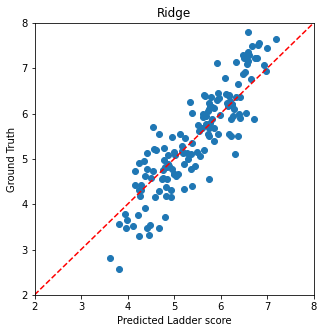

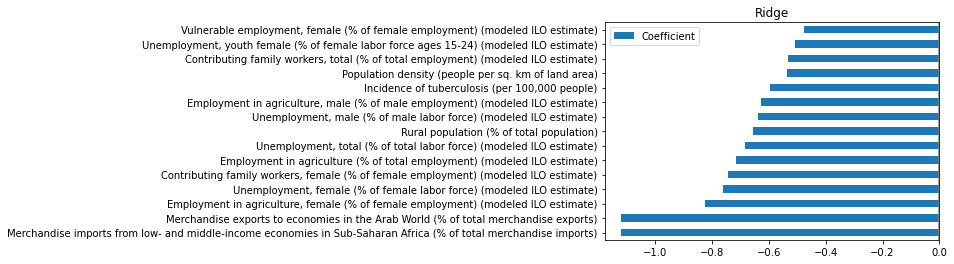

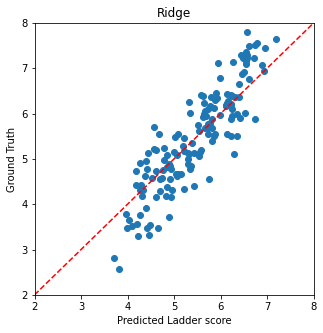

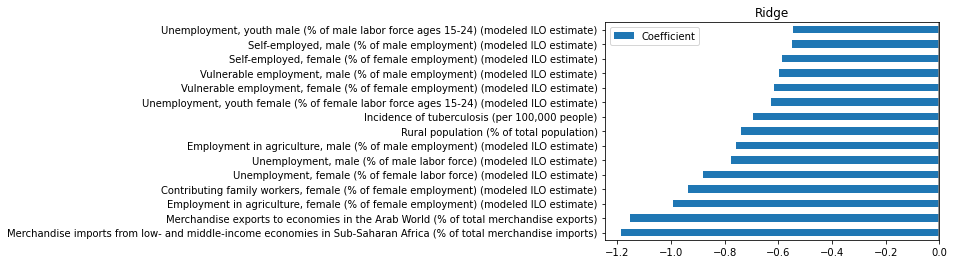

In [5]:
test_size = 1
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs[:10], "\n")
utils.visualize_predictions(reg_model=ridge, data=wb_data, gt=whr_data)
utils.visualize_coefs(reg_model=ridge, indicators=wb_data.columns.values, n=15)

#reset ridge parameters before re-training
ridge = sklearn.linear_model.Ridge()

loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge, n=1000, data=wb_data_short, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs[:10])
utils.visualize_predictions(reg_model=ridge, data=wb_data_short, gt=whr_data)
utils.visualize_coefs(reg_model=ridge, indicators=wb_data_short.columns.values, n=15)

## Lasso regression

In [6]:
lasso = sklearn.linear_model.Lasso(alpha=0.001)

Mean loss (full set of indicators): 0.35982729631895816
The average size of the first ten coefficients ((full set of indicators)): 0.0347 

Mean loss (reduced set of indicators): 0.34680831408509705
The average size of the first ten coefficients (reduced set of indicators): 0.032


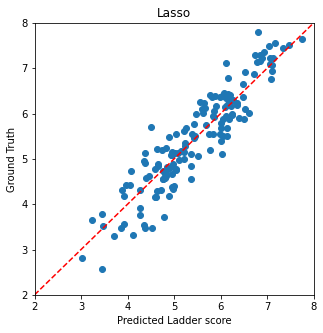

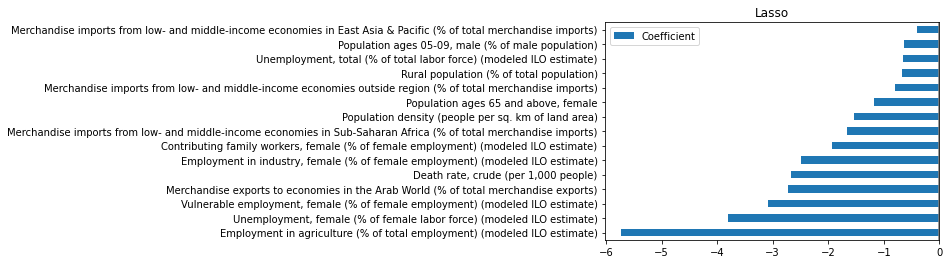

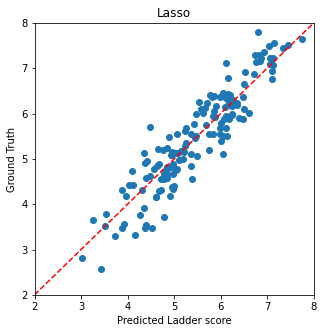

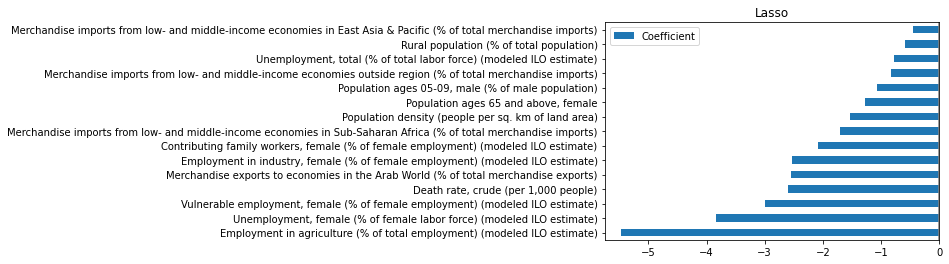

In [7]:
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (full set of indicators):", mean_loss)
print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs, "\n")
utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
utils.visualize_coefs(reg_model=lasso, indicators=wb_data.columns.values, n=15)

# reset lasso parameters before re-training
lasso = sklearn.linear_model.Lasso(alpha=0.001)

loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=lasso, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
print("Mean loss (reduced set of indicators):", mean_loss)
print("The average size of the first ten coefficients (reduced set of indicators):", avg_coefs)
utils.visualize_predictions(reg_model=lasso, data=wb_data, gt=whr_data)
utils.visualize_coefs(reg_model=lasso, indicators=wb_data.columns.values, n=15)

## Optimizing penalty parameter $\alpha$

In [8]:
alphas = [0.01, 0.1, 1, 10]
ridge_cv = sklearn.linear_model.RidgeCV(alphas=alphas)
lasso_cv = sklearn.linear_model.LassoCV(alphas=alphas)

In [9]:
# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=ridge_cv, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
#print("Mean loss (full set of indicators):", mean_loss)
#print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs[:10], "\n")

# For the full dense indicator data
loss_list, mean_loss, coef_list, avg_coefs = utils.n_fold_ceval(reg_model=lasso_cv, n=1000, data=wb_data, gt=whr_data, test_size=test_size, scaling="normalize")
#print("Mean loss (full set of indicators):", mean_loss)
#print("The average size of the first ten coefficients ((full set of indicators)):", avg_coefs[:10], "\n")

In [10]:
print("Best alpha for ridge: ", ridge_cv.alpha_)
print("Best alpha for lasso: ", lasso_cv.alpha_)
mean_loss

Best alpha for ridge:  0.1
Best alpha for lasso:  0.01


0.4910481240733817

### TODO: visualization for different alpha parameters